# Define High Quality Wine 
- Author: Wei-Ta Kuan
- Date: 2022.02.12
- Source: https://www.kaggle.com/yasserh/wine-quality-dataset

In [61]:
import pandas as pd
import seaborn as sns
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

## Data Observation
This dataset has 1143 records include 13 columns, which is 
- fixed acidity 
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- quality
- Id

In [62]:
data = pd.read_csv("WineQT.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [63]:
data.shape

(1143, 13)

In [64]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

**Check the column types**

Most of the column were numerical value. However, the quality should be catogorize value. Hence, change the quality column into category type.

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [66]:
data['quality'] = data['quality'].astype("category")

**Check Missing Value**

There is no missing value in this dataset.

In [67]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
Id                      False
dtype: bool

**Descriptive Statistics**

This dataset has 6 different quality of wine

In [68]:
data.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.0,1143.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,483.0,NaN
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,NaN,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,NaN,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,NaN,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,NaN,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,NaN,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,NaN,1209.500000


In [69]:
set(data['quality'])

{3, 4, 5, 6, 7, 8}

In [70]:
data.groupby('quality').count()['Id']

quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: Id, dtype: int64

**Drop ID**

In [71]:
data.drop("Id", axis=1, inplace=True)

Free sulfur dioxide	and Total sulfur dioxide had serious right skewed. Use log transformation for this two columns

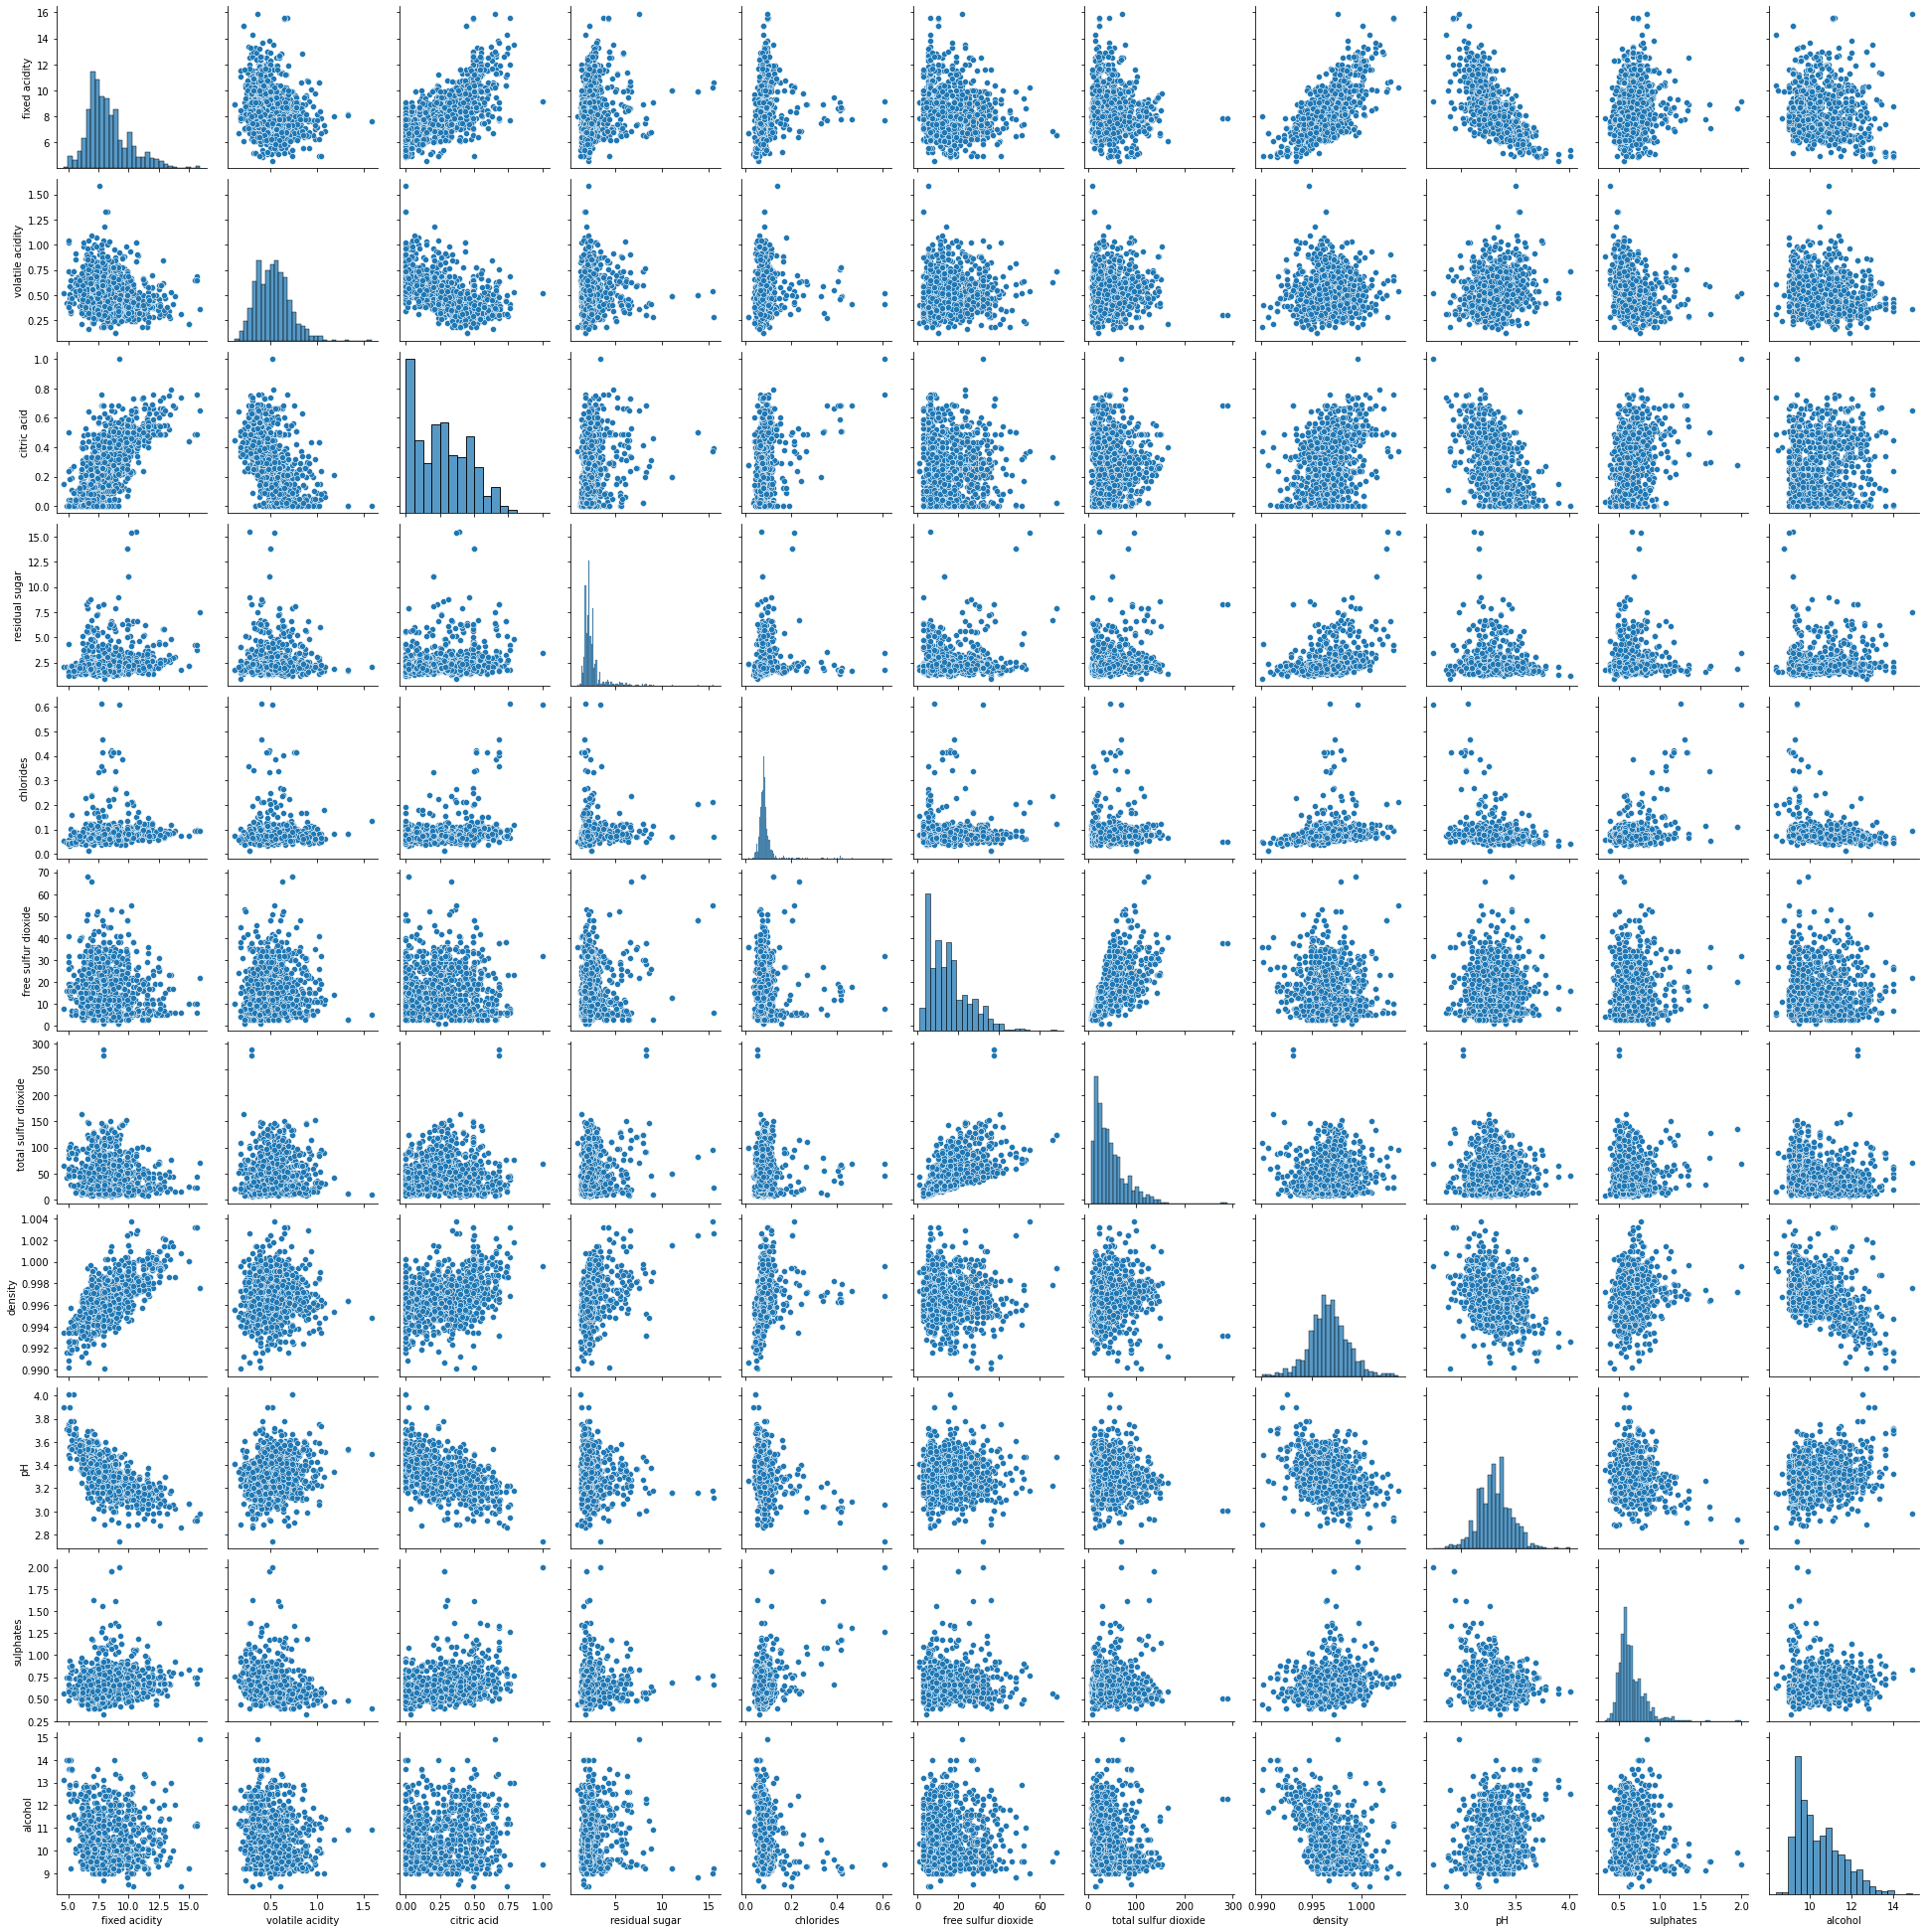

In [72]:
sns.pairplot(data=data)

<AxesSubplot:>

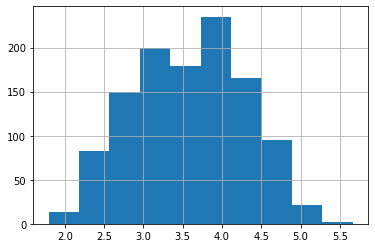

In [73]:
data['total sulfur dioxide'] = np.log(data['total sulfur dioxide'])
data['total sulfur dioxide'].hist()

<AxesSubplot:>

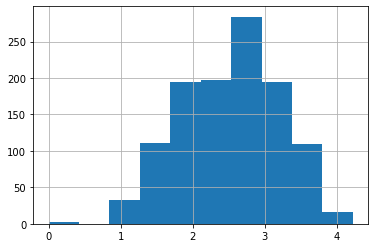

In [74]:
data['free sulfur dioxide'] = np.log(data['free sulfur dioxide'])
data['free sulfur dioxide'].hist()

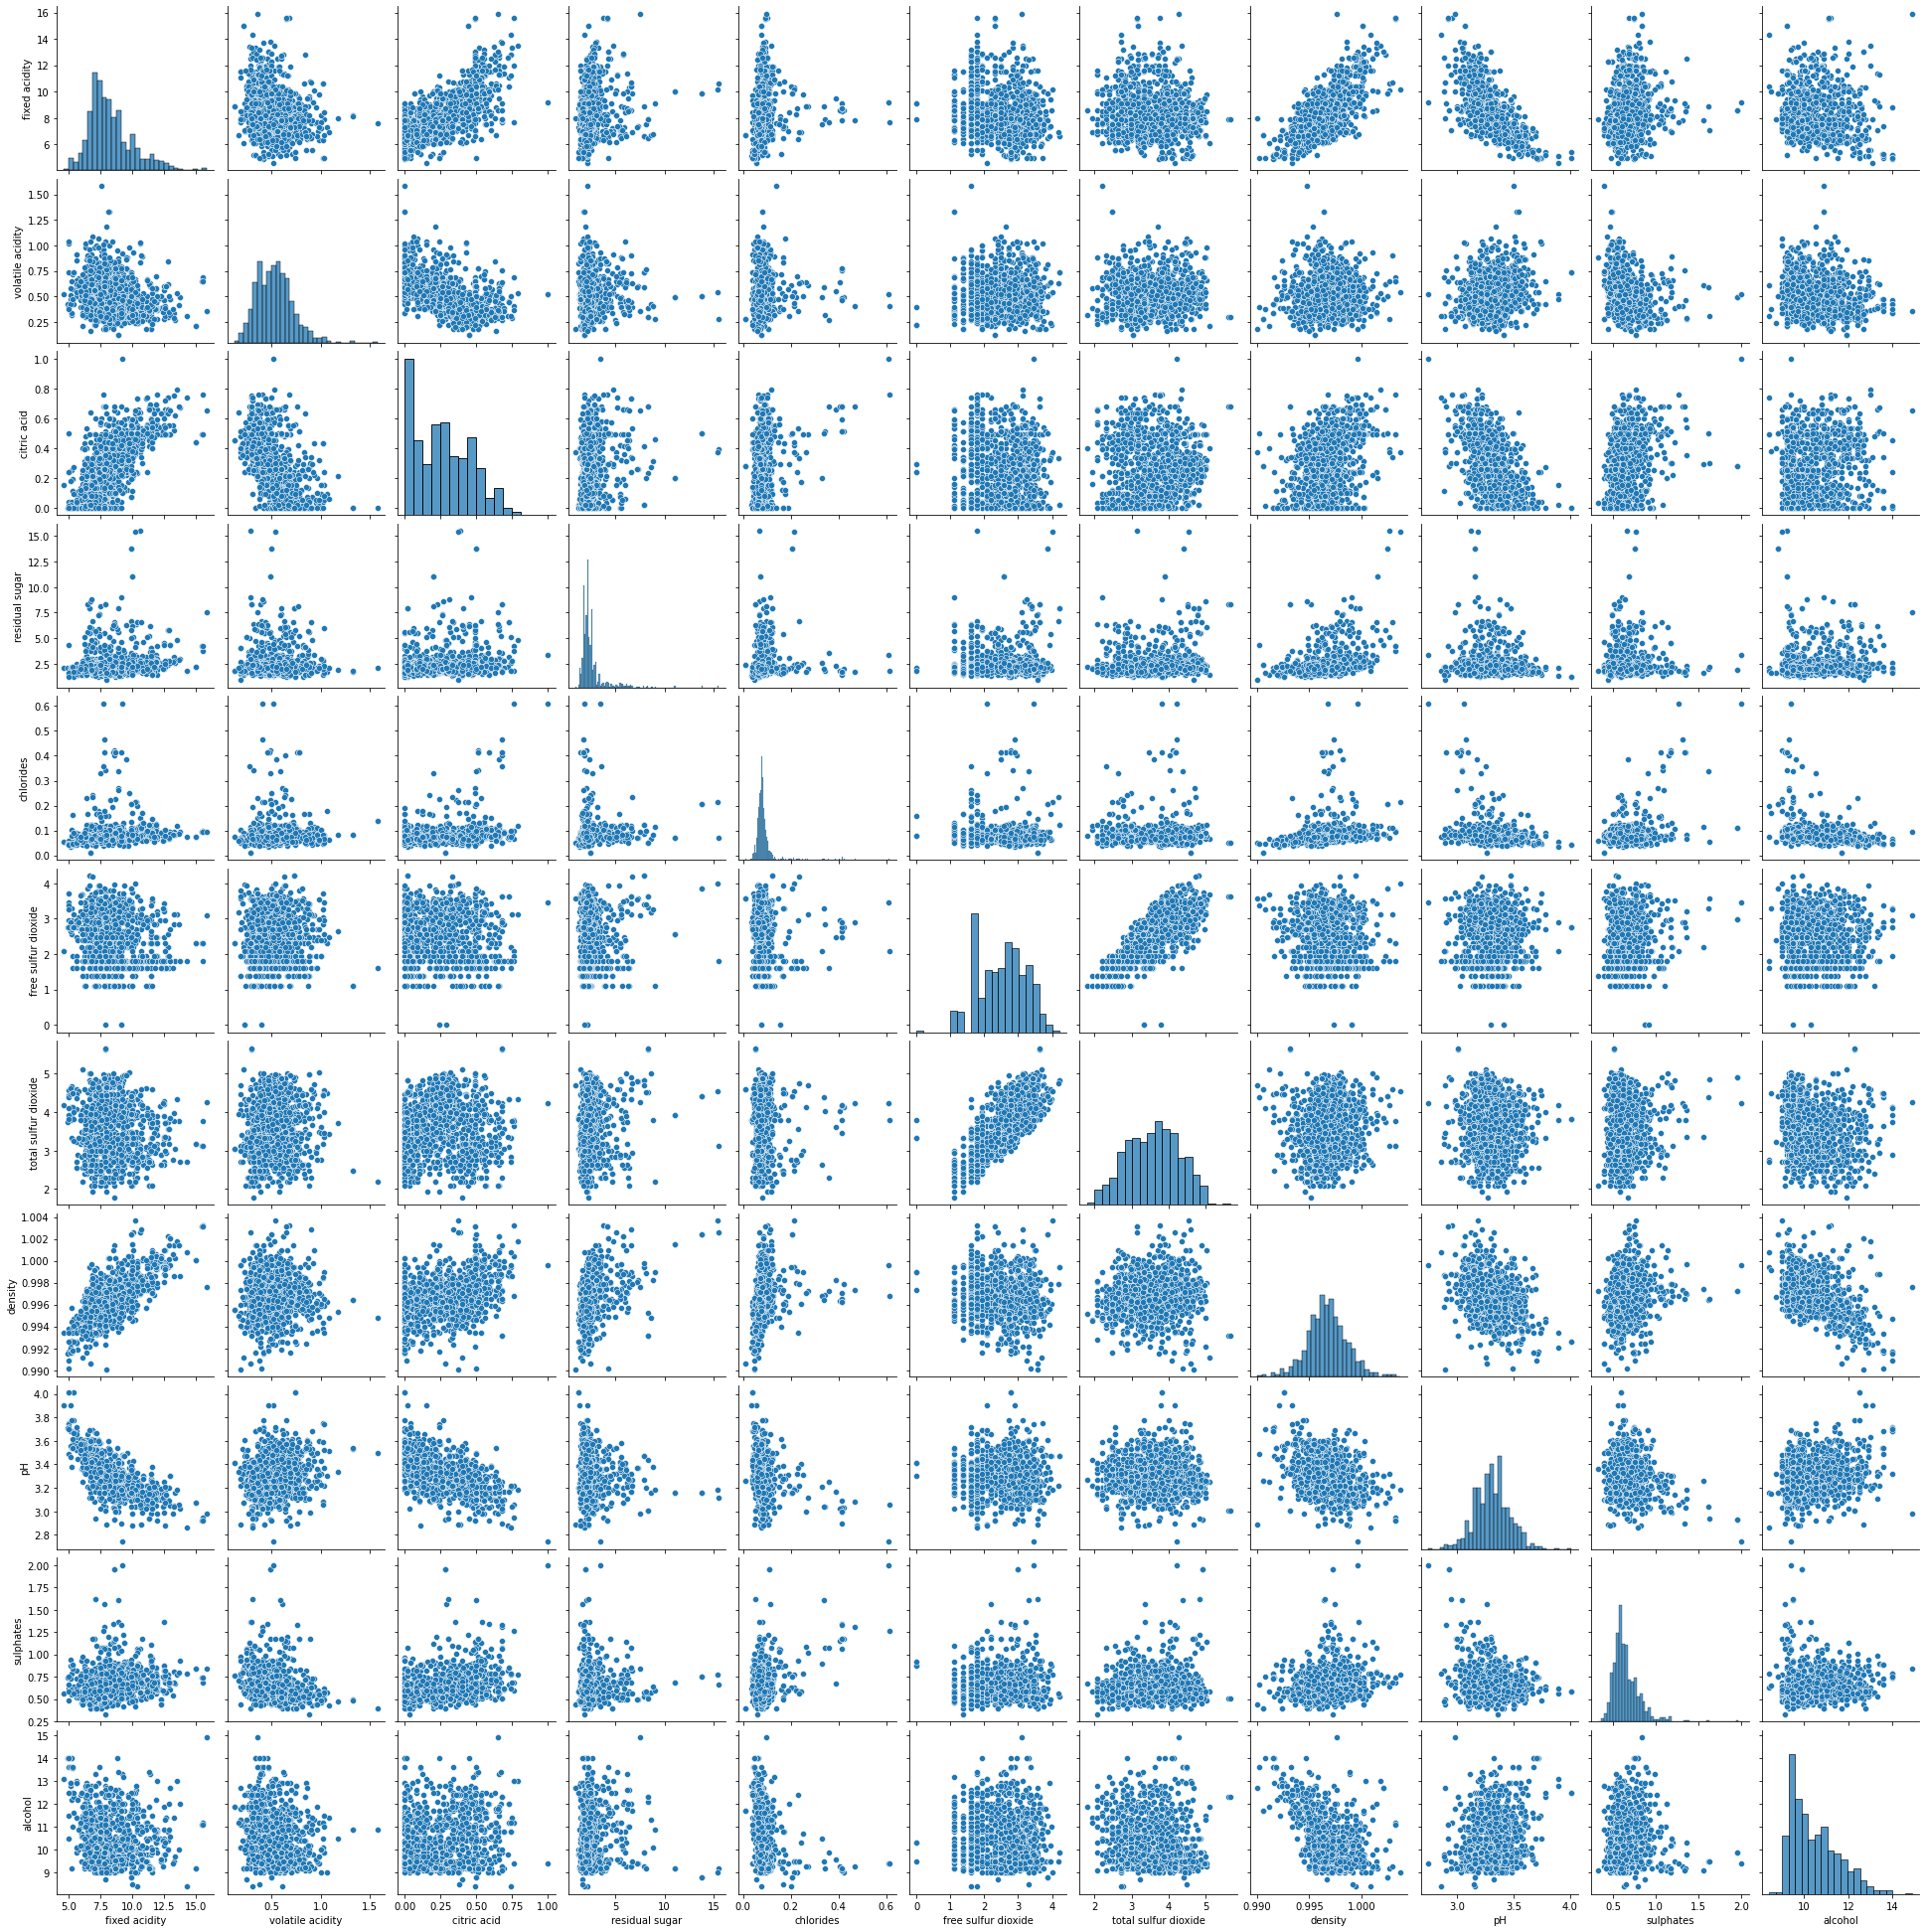

In [75]:
sns.pairplot(data=data)

<AxesSubplot:>

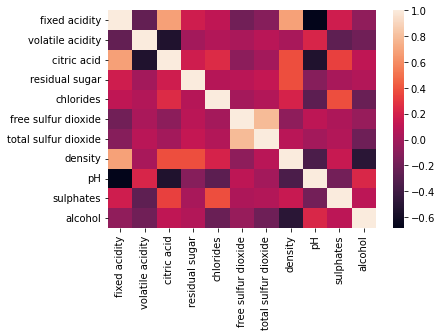

In [76]:
sns.heatmap(data.corr())

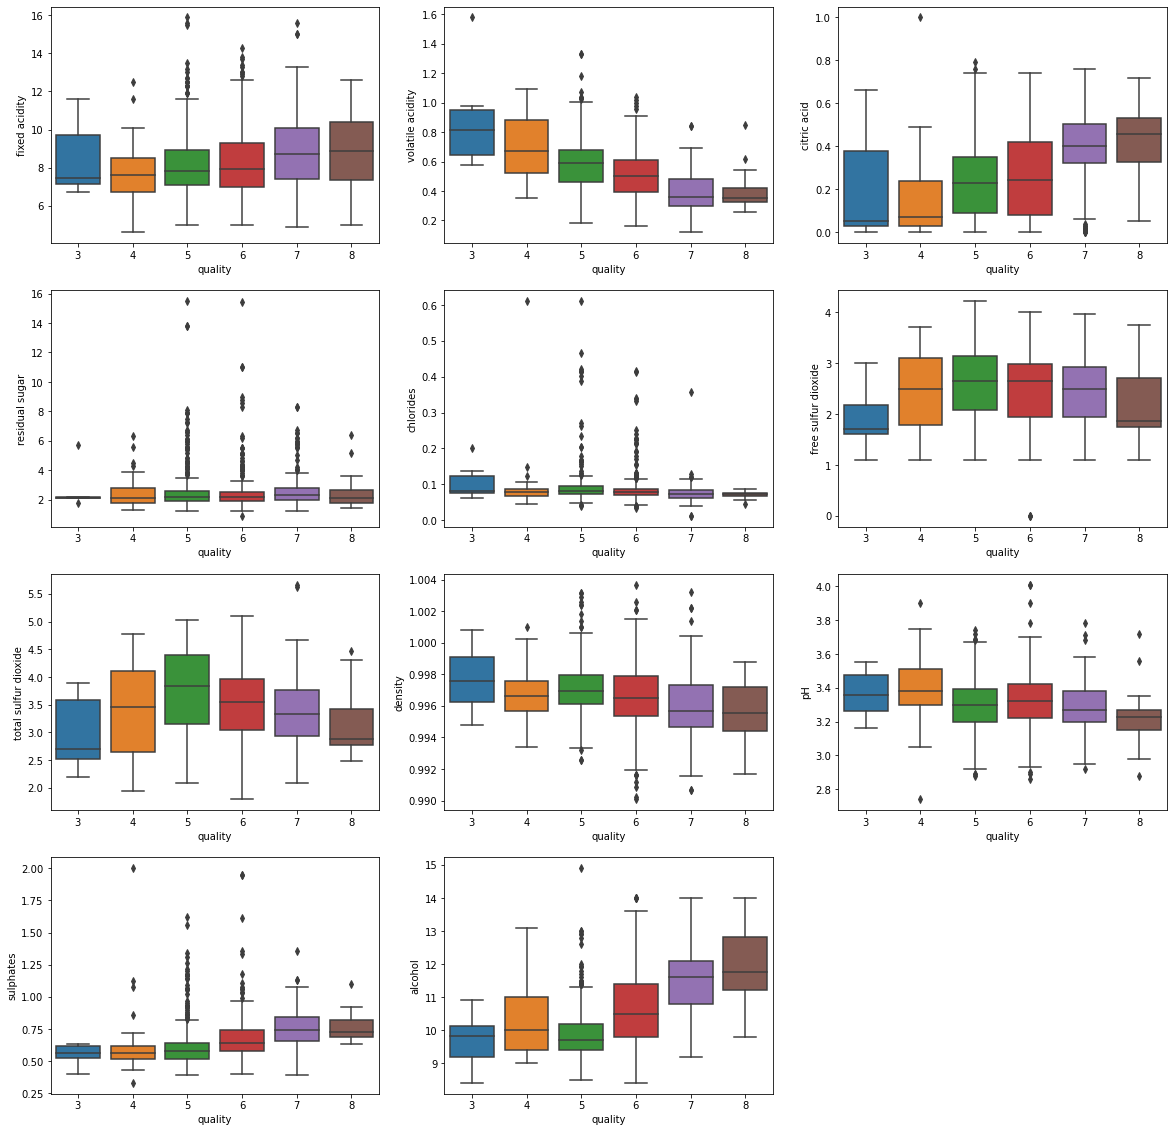

In [77]:
f = plt.figure(figsize=(20, 20))
count = 0
for i in data.loc[:, data.columns != 'quality'].columns.tolist():
    f.add_subplot(4, 3, count + 1)
    sns.boxplot(data=data, y=i, x='quality')
    count += 1

# Machine Learning

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [79]:
features = data.loc[:, data.columns != "quality"]
label = data['quality']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(features, label)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("---" * 30)
print(classification_report(y_pred, y_test))
print("---" * 30)

------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.61      0.66      0.63       112
           6       0.64      0.55      0.59       122
           7       0.63      0.64      0.64        42
           8       0.25      0.25      0.25         4

    accuracy                           0.59       286
   macro avg       0.35      0.35      0.35       286
weighted avg       0.61      0.59      0.60       286

------------------------------------------------------------------------------------------


In [101]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("---" * 30)
print(classification_report(y_pred, y_test, zero_division=0))
print("---" * 30)

------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         4
           5       0.66      0.68      0.67       119
           6       0.65      0.52      0.58       130
           7       0.47      0.61      0.53        33
           8       0.00      0.00      0.00         0

    accuracy                           0.59       286
   macro avg       0.30      0.30      0.30       286
weighted avg       0.63      0.59      0.60       286

------------------------------------------------------------------------------------------


In [100]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("---" * 30)
print(classification_report(y_pred, y_test, zero_division=0))
print("---" * 30)

------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.72      0.75      0.74       117
           6       0.74      0.56      0.64       138
           7       0.47      0.71      0.56        28
           8       0.25      0.50      0.33         2

    accuracy                           0.65       286
   macro avg       0.36      0.42      0.38       286
weighted avg       0.70      0.65      0.67       286

------------------------------------------------------------------------------------------
